In [1]:
#케라스의 이미지 제네레이터를 불러옵니다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#제네레이터 생성
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0.2,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   shear_range=0.05,
                                   zoom_range=0.05,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

#이미지 로드
train = train_datagen.flow_from_directory('sample_data\\train',
                                        target_size = (224,224),
                                        batch_size = 16)
test = test_datagen.flow_from_directory('sample_data\\test',
                                        target_size = (224,224),
                                        batch_size = 16)

Found 1500 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [8]:
#케라스 API 를 통한 모델의 작성

import tensorflow  as tf

inputs = tf.keras.layers.Input(shape = (224,224,3))

#첫번째 합성곱 층
conv1 = tf.keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same')(inputs)
conv1_pool = tf.keras.layers.MaxPooling2D(2)(conv1)

#두번째 합성곱 층
conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv1_pool)
conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv2)
conv2_pool = tf.keras.layers.MaxPooling2D(2)(conv2)

#세번째 합성곱 층
conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same')(conv2_pool)
conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same')(conv3)
conv3_pool = tf.keras.layers.MaxPooling2D(2)(conv3)

#완전 연결 층
flat = tf.keras.layers.Flatten()(conv3_pool)
fc1 = tf.keras.layers.Dense(128, activation = 'relu')(flat)
fc2 = tf.keras.layers.Dense(64, activation = 'relu')(fc1)
out = tf.keras.layers.Dense(3, activation = 'softmax')(fc2)

Basic_CNN = tf.keras.models.Model(inputs = inputs, outputs = out)
Basic_CNN.compile('adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [9]:
Basic_CNN.fit(train, epochs = 10,
             validation_data = test)

Epoch 1/10
94/94 [==============================] - 25s 261ms/step - loss: 1.0720 - accuracy: 0.4600 - val_loss: 0.8143 - val_accuracy: 0.5933
Epoch 2/10
94/94 [==============================] - 24s 255ms/step - loss: 0.7314 - accuracy: 0.6680 - val_loss: 0.7867 - val_accuracy: 0.6000
Epoch 3/10
94/94 [==============================] - 24s 255ms/step - loss: 0.6649 - accuracy: 0.6967 - val_loss: 0.7687 - val_accuracy: 0.6133
Epoch 4/10
94/94 [==============================] - 24s 255ms/step - loss: 0.6106 - accuracy: 0.7147 - val_loss: 0.4613 - val_accuracy: 0.7600
Epoch 5/10
94/94 [==============================] - 24s 257ms/step - loss: 0.5343 - accuracy: 0.7647 - val_loss: 0.6004 - val_accuracy: 0.7400
Epoch 6/10
94/94 [==============================] - 24s 259ms/step - loss: 0.4499 - accuracy: 0.8147 - val_loss: 0.4973 - val_accuracy: 0.7600
Epoch 7/10
94/94 [==============================] - 24s 260ms/step - loss: 0.4144 - accuracy: 0.8200 - val_loss: 0.3676 - val_accuracy: 0.8533

True class is middle marbling


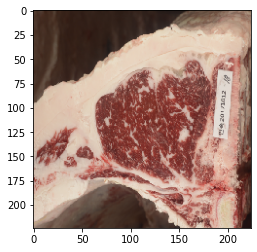

In [10]:
from matplotlib import pyplot as plt
import numpy as np

#예시 이미지 불러오기
X, y = test.next()
test_img = X[0:1]
true_y = y[0:1]

#class_dic 생성
class_dic = {v:i for i,v in test.class_indices.items()}
true_class = class_dic[np.argmax(true_y[0])]

#예시 데이터 확인
plt.imshow(test_img[0])
print('True class is {0} marbling'.format(true_class))

In [12]:
pred_y = Basic_CNN.predict(test_img)
pred_class = class_dic[np.argmax(pred_y[0])]
print('Pred class is {0} marbling ({1}%)'
      .format(pred_class,round(np.max(pred_y) * 100,2)))

Pred class is middle marbling (71.06%)
